In [95]:
import yfinance as yf
import datetime

start = "2015-01-01"
end = datetime.datetime.today()

blackrock = yf.download("BLK", start=start, end=end)
sp500 = yf.download("^GSPC", start=start, end=end)
nasdaq = yf.download("^IXIC", start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [96]:
blackrock.head()

Price,Close,High,Low,Open,Volume
Ticker,BLK,BLK,BLK,BLK,BLK
Date,,,,,
2015-01-02,271.217010,273.619519,267.955375,272.167369,367000
2015-01-05,264.199463,269.346592,263.515210,268.563498,465900
2015-01-06,260.093903,267.339429,257.394873,265.111796,626400
2015-01-07,265.598419,266.085014,261.736175,262.412818,388300
2015-01-08,268.700470,269.635608,267.309133,268.259491,480600


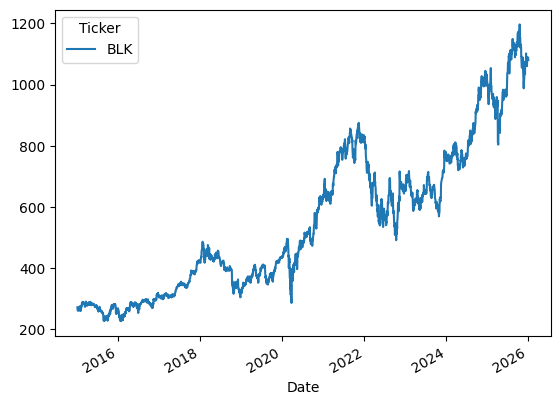

In [97]:
import matplotlib.pyplot as plt
blackrock['Close'].plot()
plt.show()

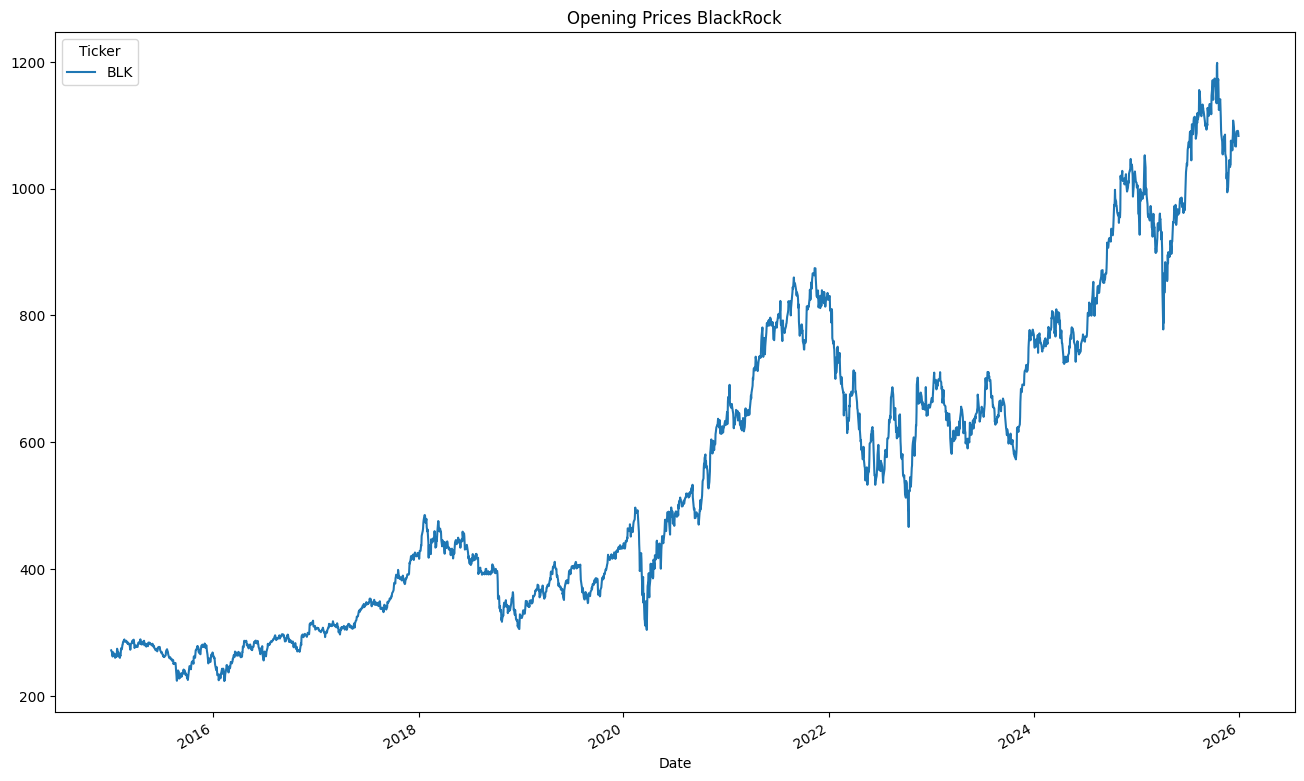

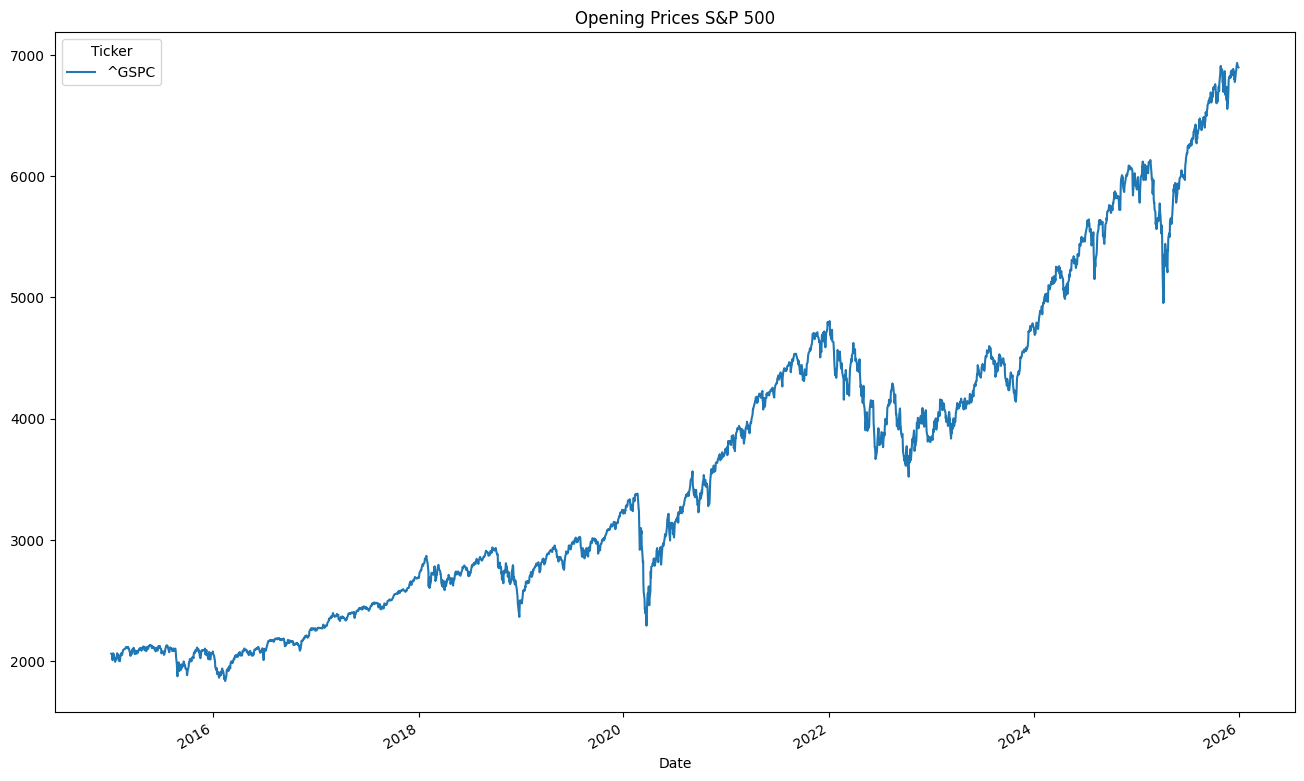

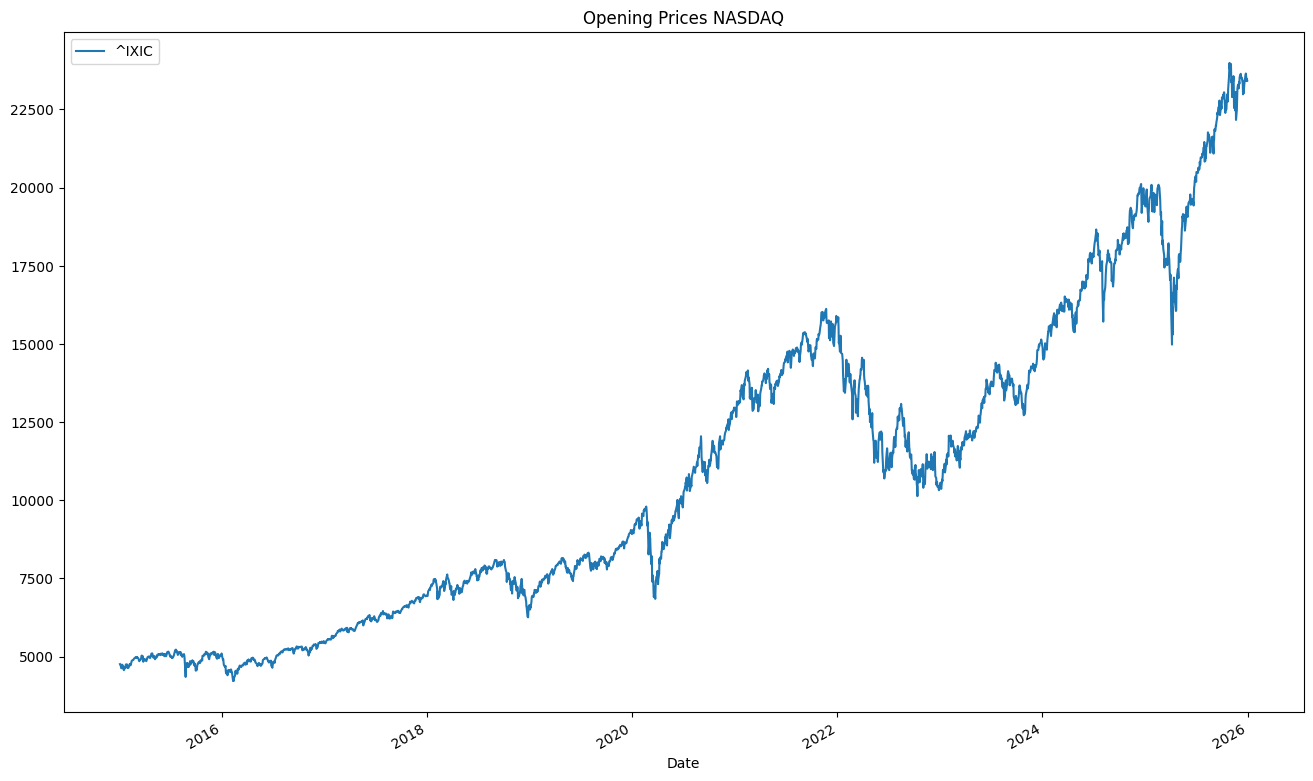

In [98]:

blackrock['Open'].plot(label = 'blackrock', figsize = (16,10), title = 'Opening Prices BlackRock')
sp500['Open'].plot(label = 'sp500',figsize = (16,10), title = 'Opening Prices S&P 500')
nasdaq['Open'].plot(label = 'nasdaq',figsize = (16,10), title = 'Opening Prices NASDAQ')
plt.legend(loc = 'best')

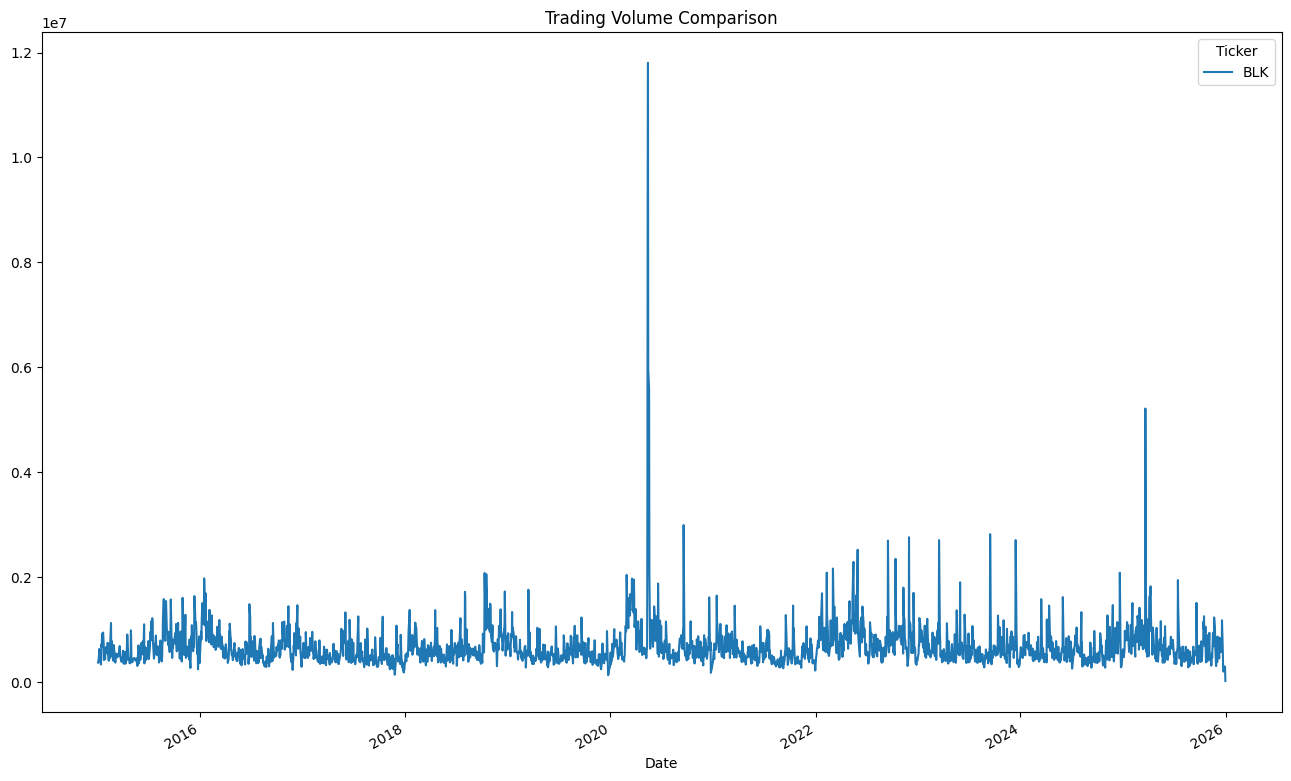

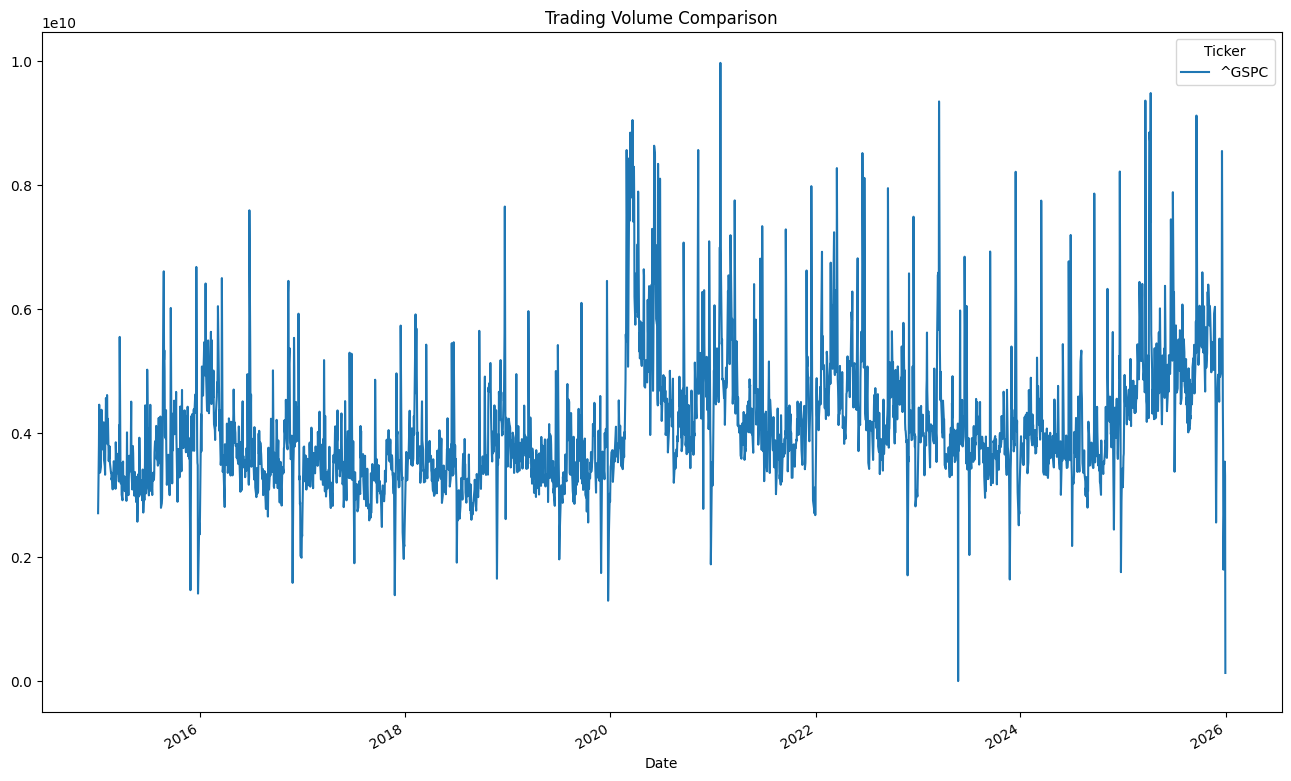

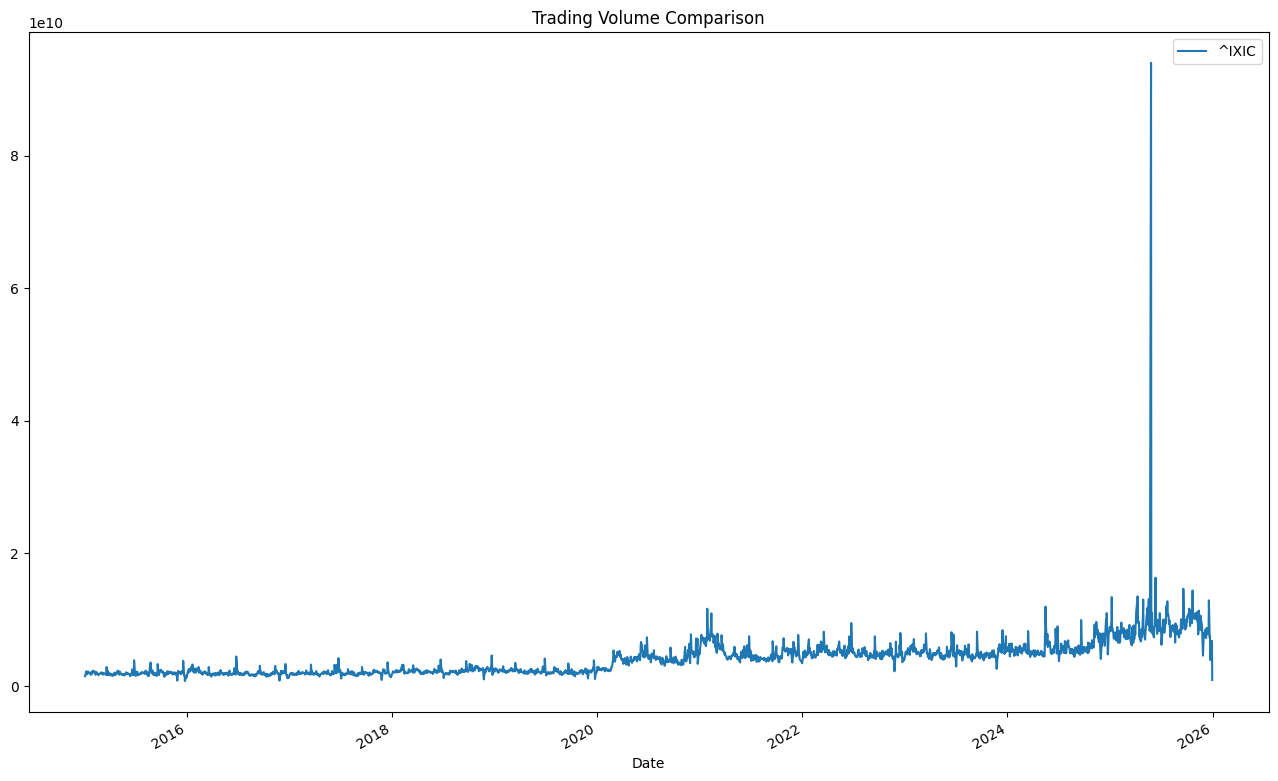

In [99]:
blackrock['Volume'].plot(label='BlackRock', figsize=(16,10),title='Trading Volume Comparison')
sp500['Volume'].plot(label='S&P 500', figsize=(16,10),title='Trading Volume Comparison')
nasdaq['Volume'].plot(label='Nasdaq', figsize=(16,10),title='Trading Volume Comparison')

plt.legend()
plt.show()

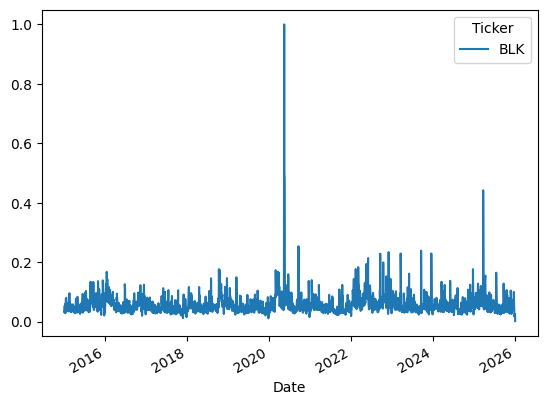

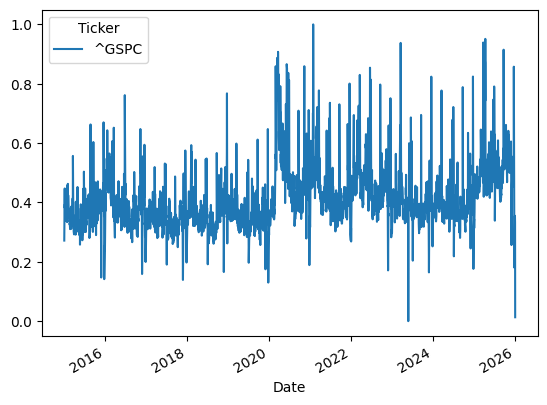

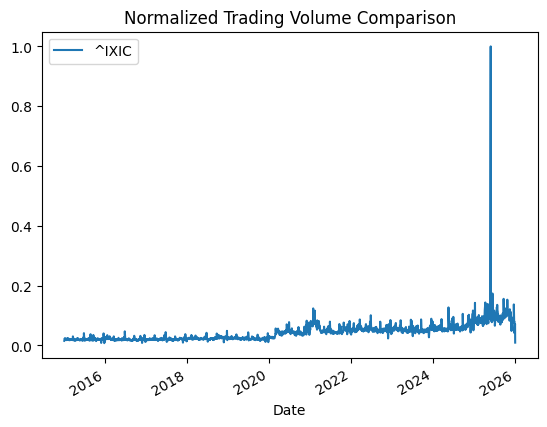

In [100]:
(blackrock['Volume'] / blackrock['Volume'].max()).plot(label='BlackRock')
(sp500['Volume'] / sp500['Volume'].max()).plot(label='S&P 500')
(nasdaq['Volume'] / nasdaq['Volume'].max()).plot(label='Nasdaq')

plt.title("Normalized Trading Volume Comparison")
plt.legend()
plt.show()


In [101]:
# common_dates = blackrock.index.intersection(sp500.index).intersection(nasdaq.index)

# blackrock_c = blackrock.loc[common_dates]
# sp500_c = sp500.loc[common_dates]
# nasdaq_c = nasdaq.loc[common_dates]


In [102]:
blackrock['Total Traded'] = blackrock['Open'] * blackrock['Volume']
sp500['Total Traded'] = sp500['Open'] * sp500['Volume']
nasdaq['Total Traded'] = nasdaq['Open'] * nasdaq['Volume']



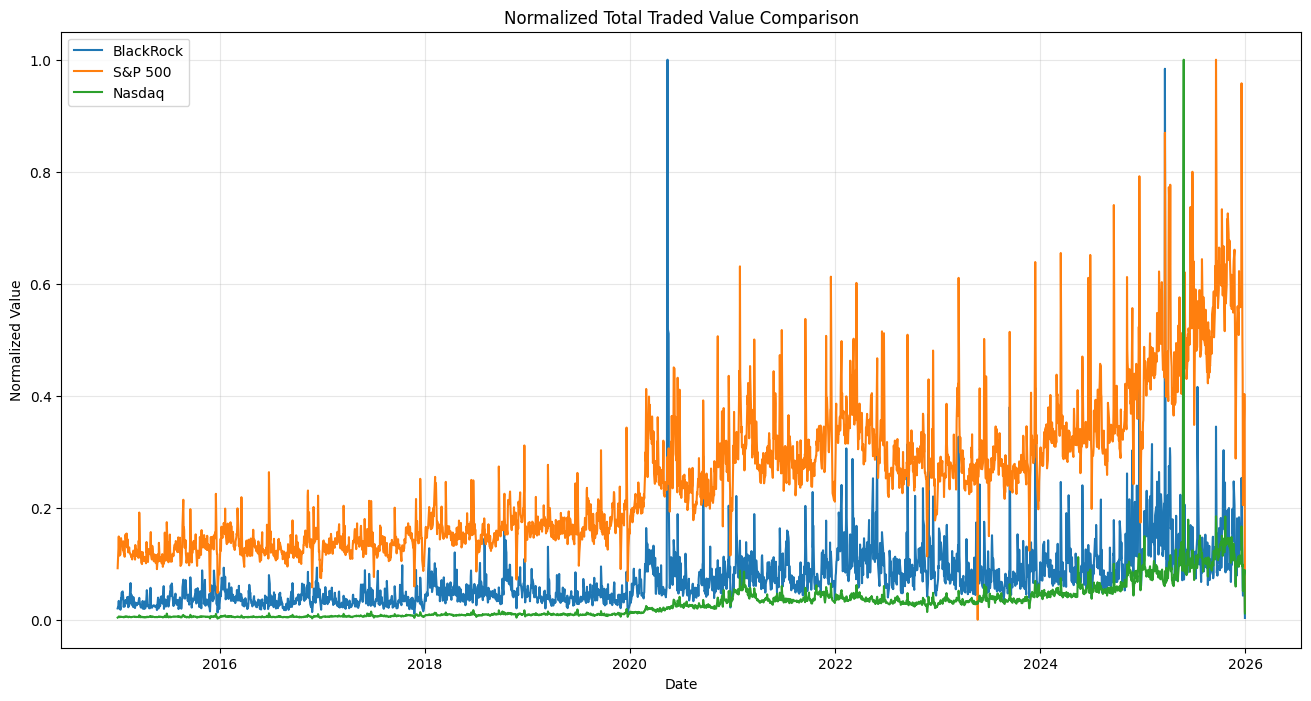

In [103]:
plt.figure(figsize=(16,8))

plt.plot(blackrock['Total Traded'] / blackrock['Total Traded'].max(), label='BlackRock')
plt.plot(sp500['Total Traded'] / sp500['Total Traded'].max(), label='S&P 500')
plt.plot(nasdaq['Total Traded'] / nasdaq['Total Traded'].max(), label='Nasdaq')

plt.title('Normalized Total Traded Value Comparison')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [104]:
blackrock.columns = blackrock.columns.get_level_values(0)
sp500.columns = sp500.columns.get_level_values(0)
nasdaq.columns = nasdaq.columns.get_level_values(0)

# Calculate average price
blackrock['Avg'] = blackrock[['High', 'Low']].mean(axis=1)
sp500['Avg'] = sp500[['High', 'Low']].mean(axis=1)
nasdaq['Avg'] = nasdaq[['High', 'Low']].mean(axis=1)

# Calculate Total Traded Value
blackrock['Total Traded New'] = blackrock['Avg'] * blackrock['Volume']
sp500['Total Traded New'] = sp500['Avg'] * sp500['Volume']
nasdaq['Total Traded New'] = nasdaq['Avg'] * nasdaq['Volume']

# Normalize for fair comparison
blackrock_norm = blackrock['Total Traded New'] / blackrock['Total Traded New'].max()
sp500_norm = sp500['Total Traded New'] / sp500['Total Traded New'].max()
nasdaq_norm = nasdaq['Total Traded New'] / nasdaq['Total Traded New'].max()




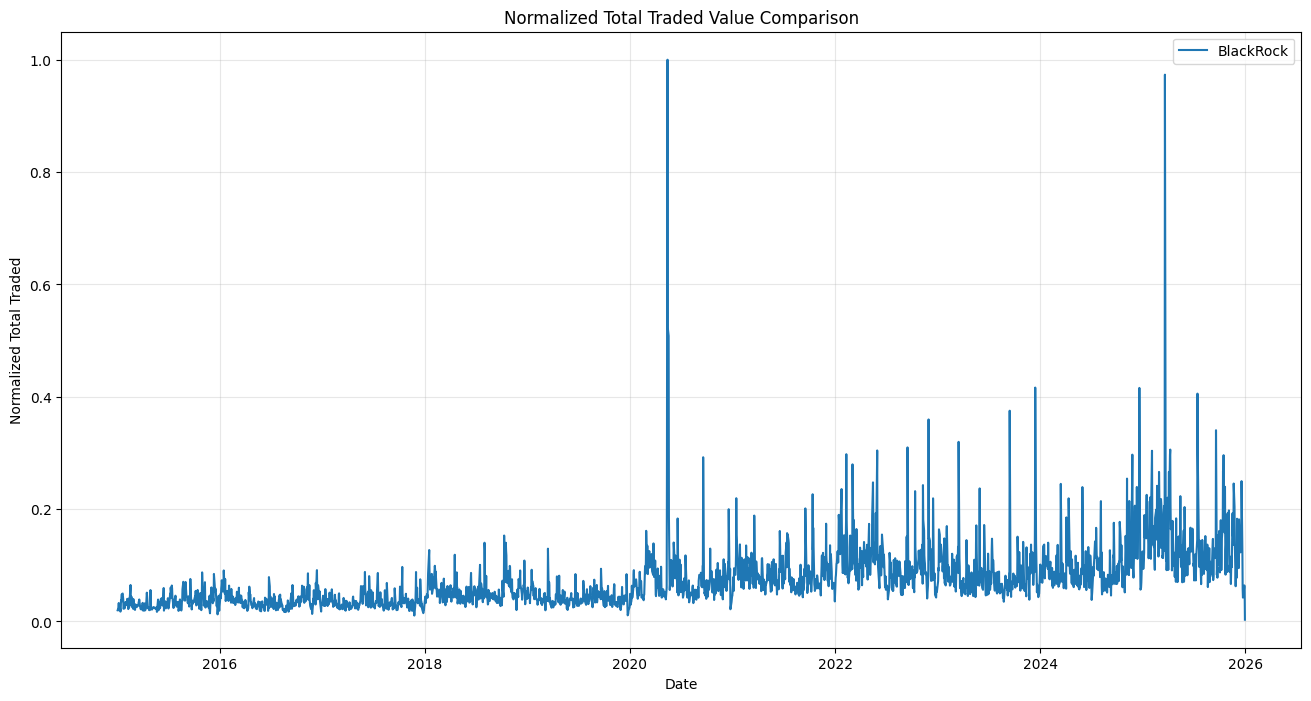

In [105]:
# Plot
plt.figure(figsize=(16,8))
plt.plot(blackrock_norm, label='BlackRock')
plt.title('Normalized Total Traded Value Comparison')
plt.xlabel('Date')
plt.ylabel('Normalized Total Traded')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

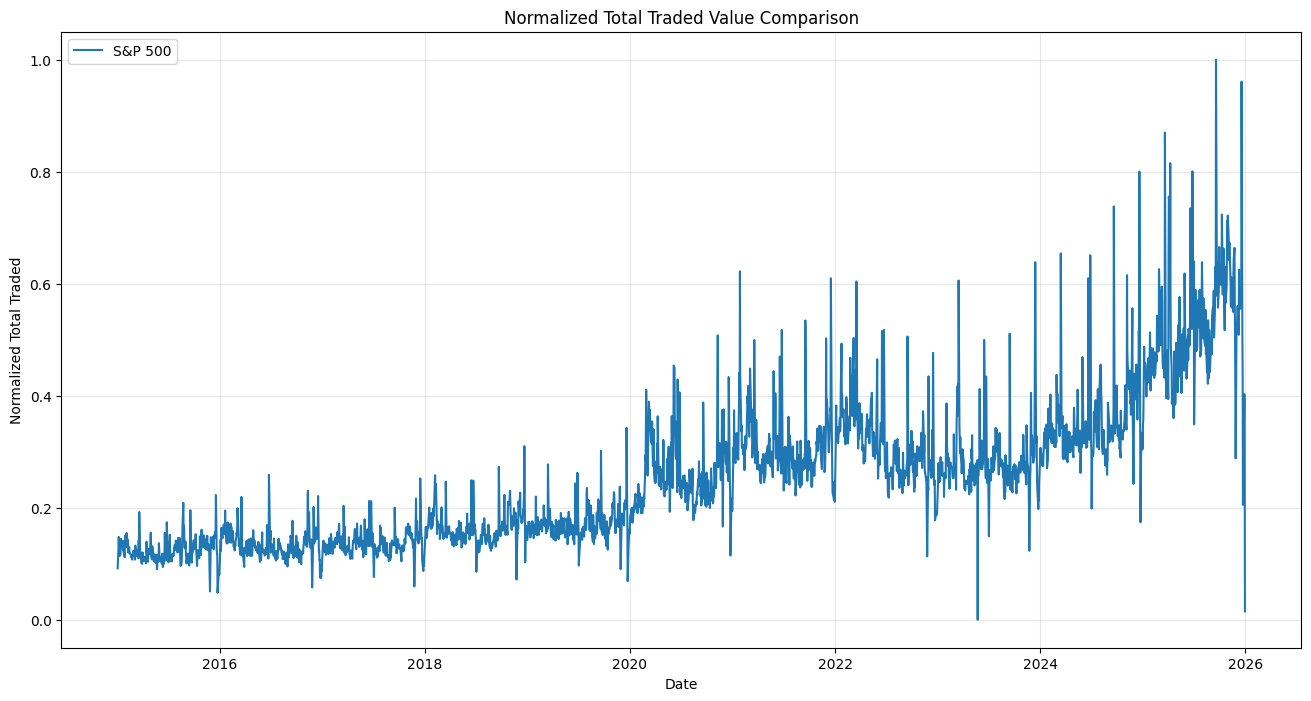

In [106]:

plt.figure(figsize=(16,8))
plt.plot(sp500_norm, label='S&P 500')
plt.title('Normalized Total Traded Value Comparison')
plt.xlabel('Date')
plt.ylabel('Normalized Total Traded')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

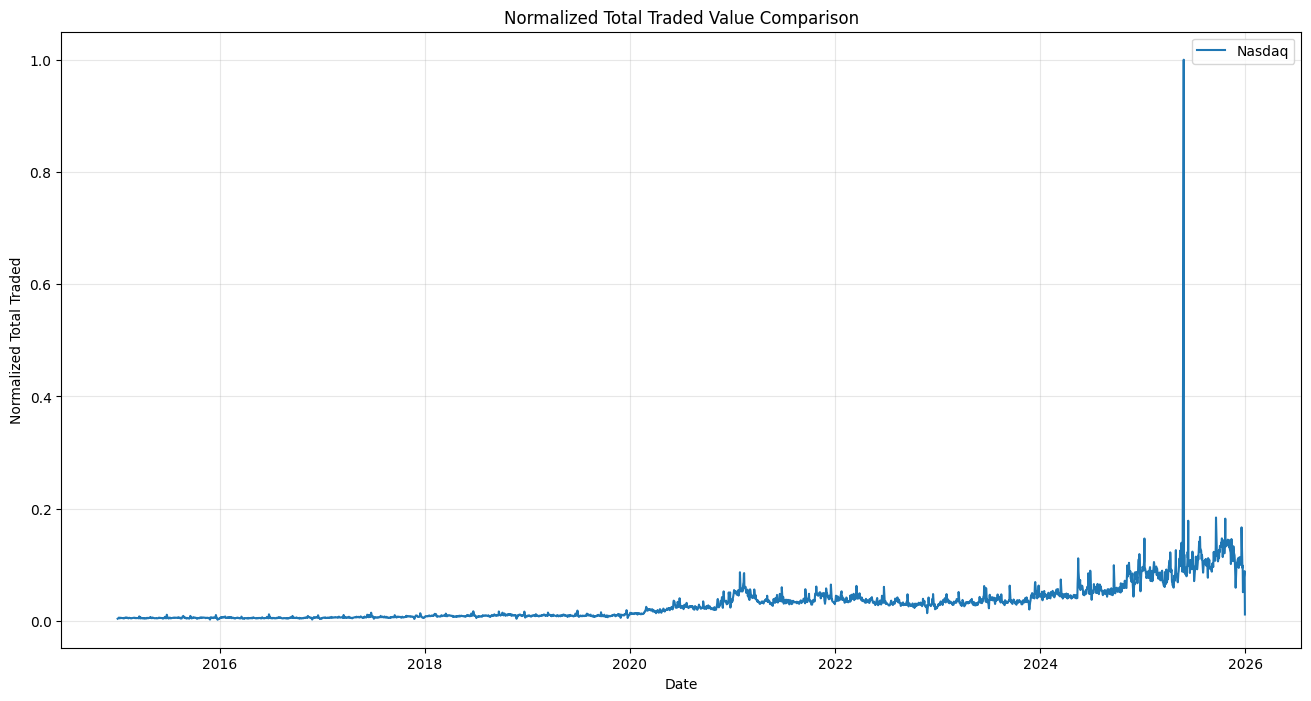

In [107]:
plt.figure(figsize=(16,8))
plt.plot(nasdaq_norm, label='Nasdaq')
plt.title('Normalized Total Traded Value Comparison')
plt.xlabel('Date')
plt.ylabel('Normalized Total Traded')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


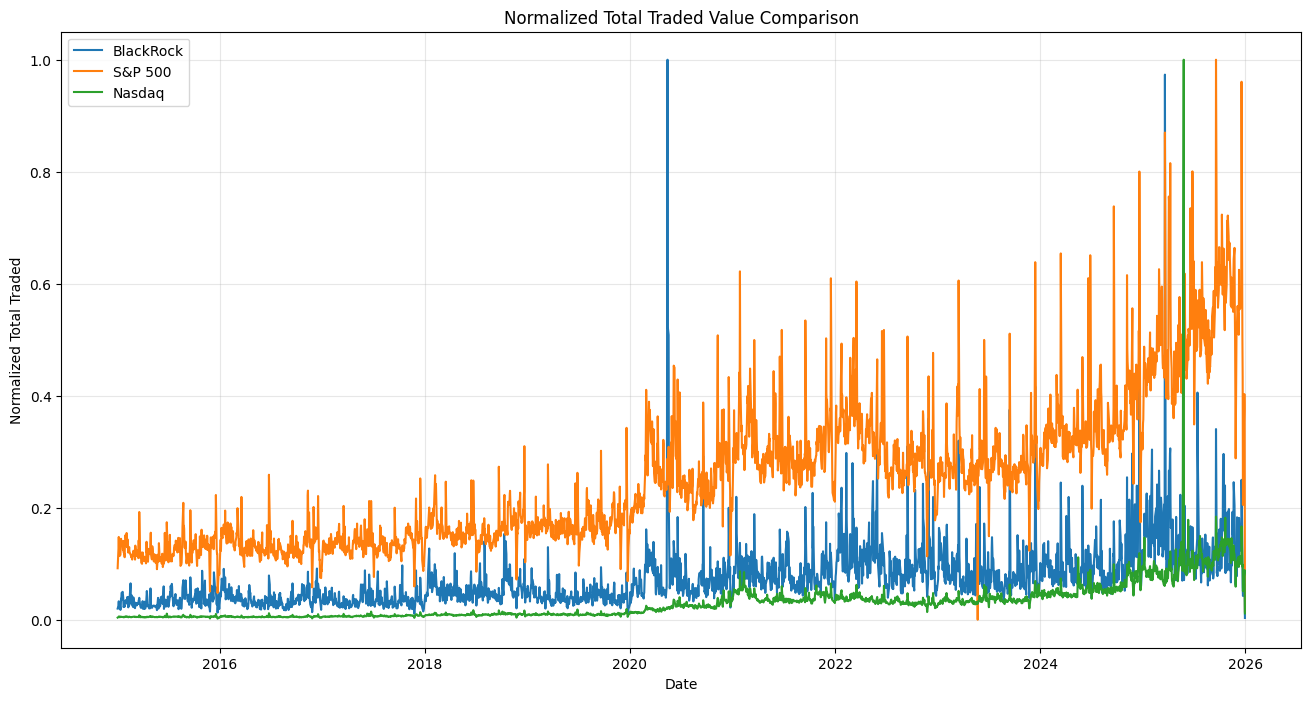

In [108]:
plt.figure(figsize=(16,8))
plt.plot(blackrock_norm, label='BlackRock')
plt.plot(sp500_norm, label='S&P 500')
plt.plot(nasdaq_norm, label='Nasdaq')
plt.title('Normalized Total Traded Value Comparison')
plt.xlabel('Date')
plt.ylabel('Normalized Total Traded')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

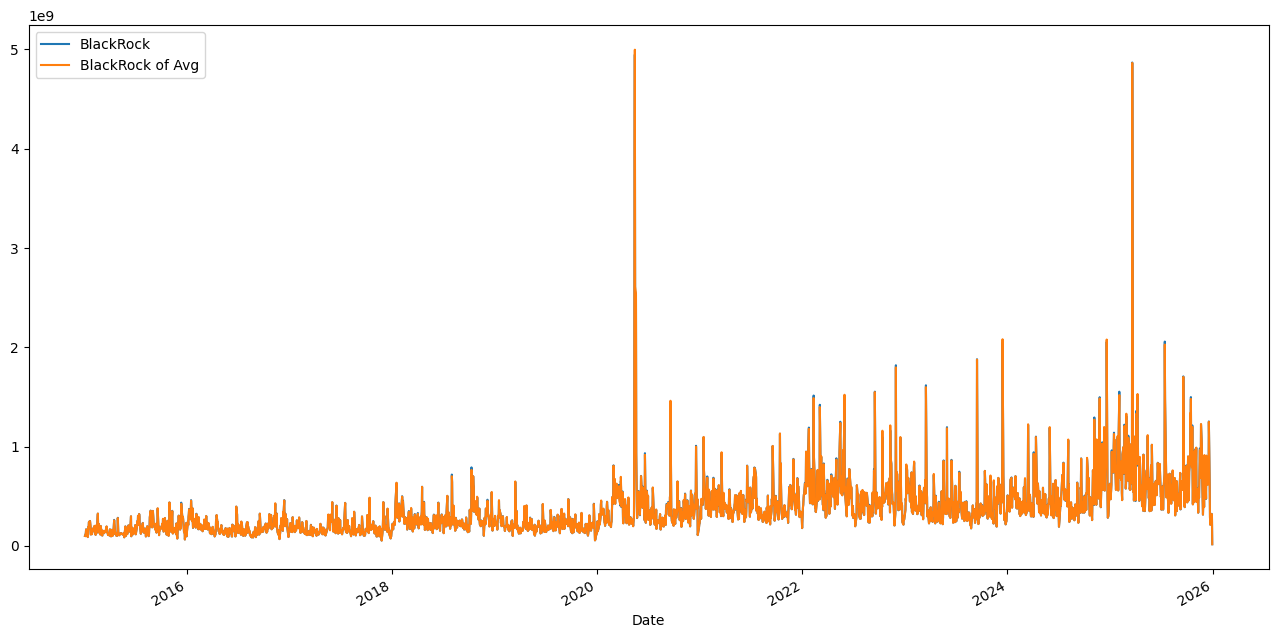

In [ ]:
#Now we can compare Total Traded vs Total Traded New.
blackrock['Total Traded'].plot(figsize = (16,8), label = 'BlackRock')
blackrock['Total Traded New'].plot(figsize = (16,8), label = 'BlackRock of Avg')
plt.legend(loc = 'best')

<Axes: xlabel='Date'>

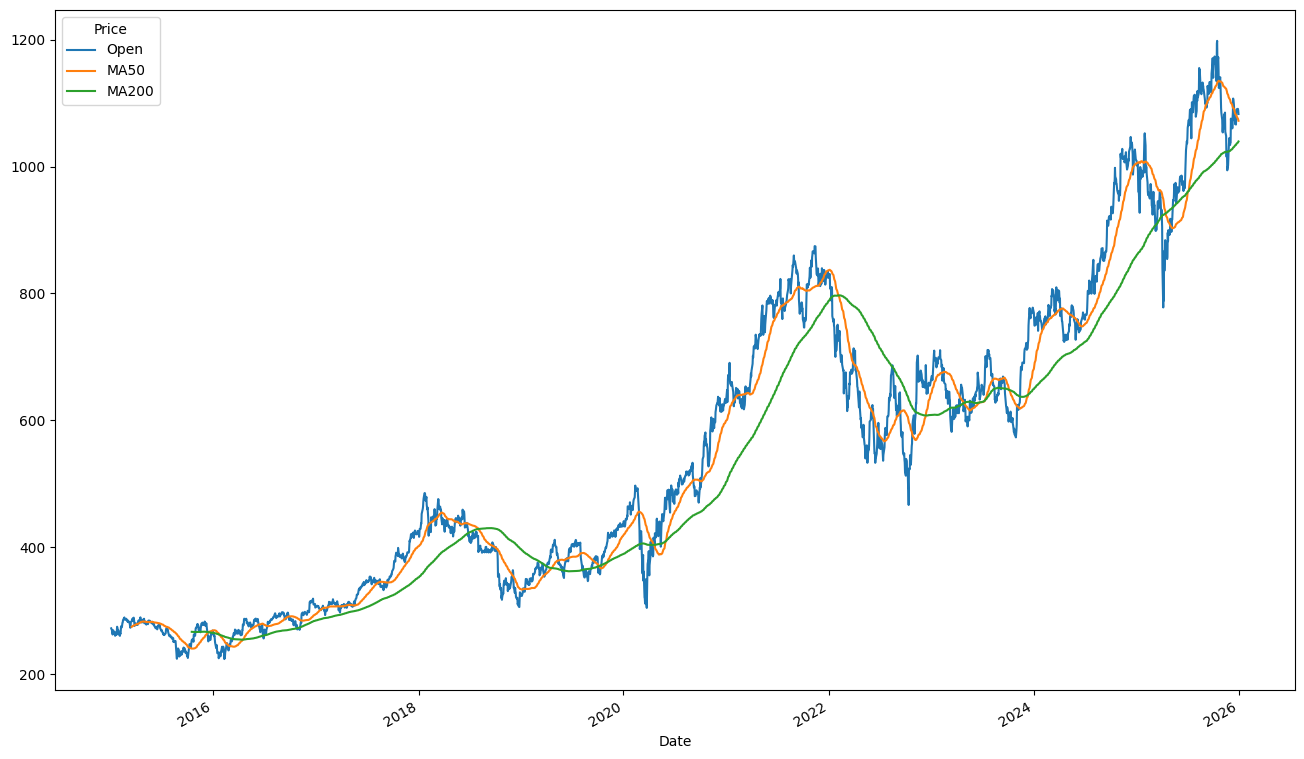

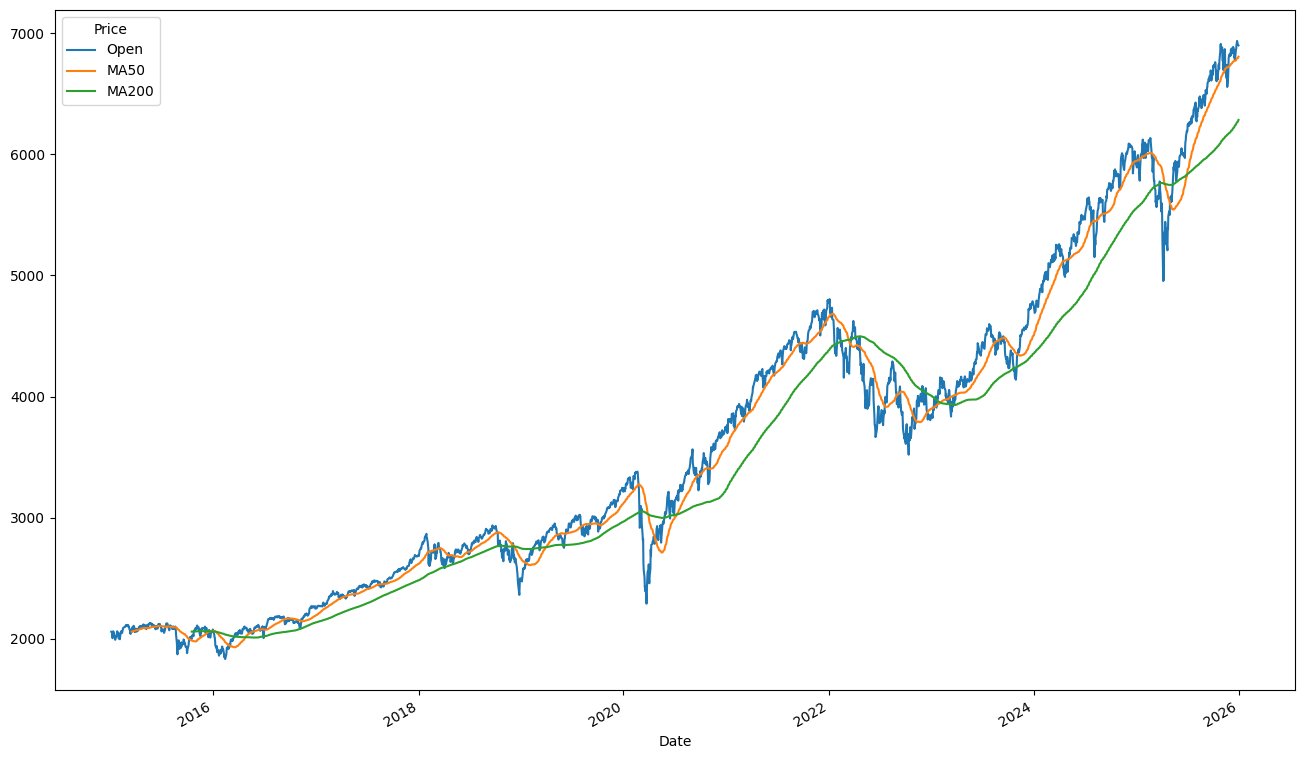

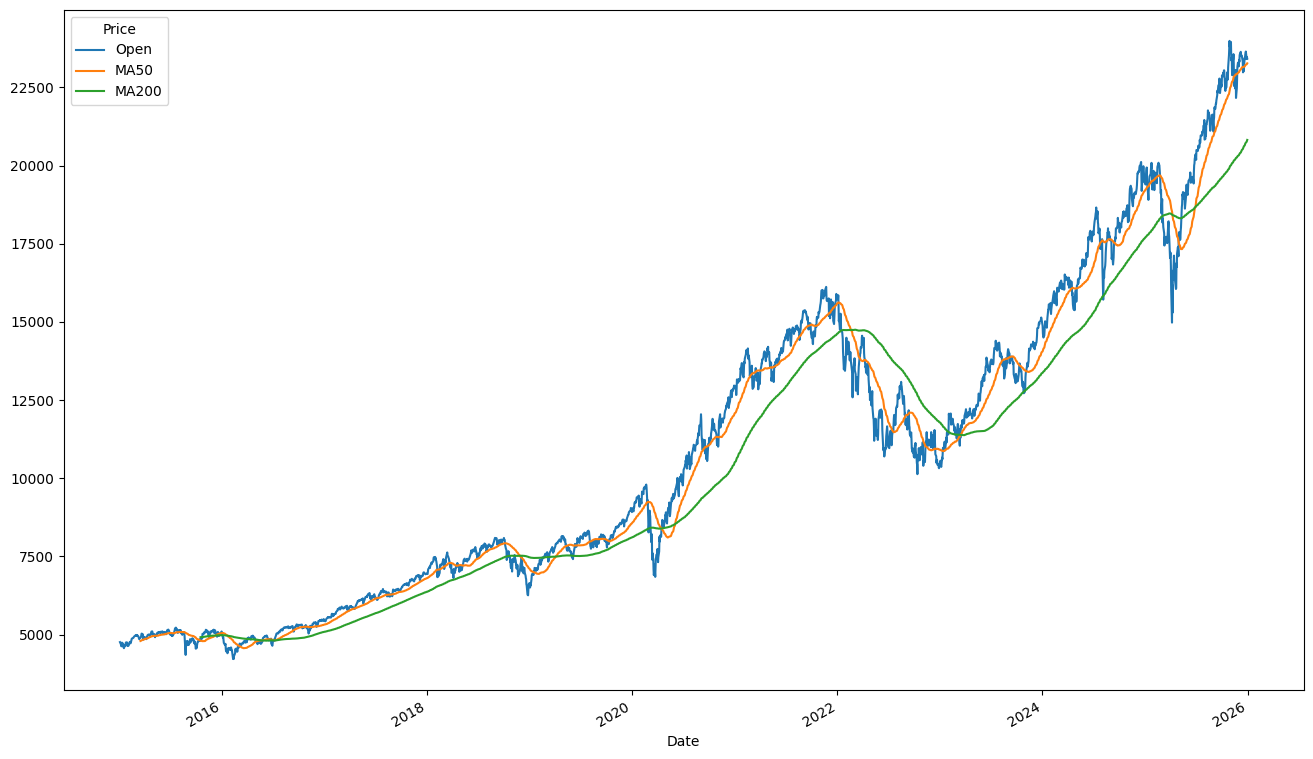

In [111]:
#Moving Average
#Moving Average (MA) is widely used in technical analysis to smooth out the 
# price by taking out the "noise" from random short-term price changes. 
# Since it is based on historical prices, it is a lagging or trend-following 
# indicator.

blackrock['MA50'] = blackrock['Open'].rolling(50).mean()
blackrock['MA200'] = blackrock['Open'].rolling(200).mean()
blackrock[['Open','MA50','MA200']].plot(figsize = (16,10))

sp500['MA50'] = sp500['Open'].rolling(50).mean()
sp500['MA200'] = sp500['Open'].rolling(200).mean()
sp500[['Open','MA50','MA200']].plot(figsize = (16,10))

nasdaq['MA50'] = nasdaq['Open'].rolling(50).mean()
nasdaq['MA200'] = nasdaq['Open'].rolling(200).mean()
nasdaq[['Open','MA50','MA200']].plot(figsize = (16,10))

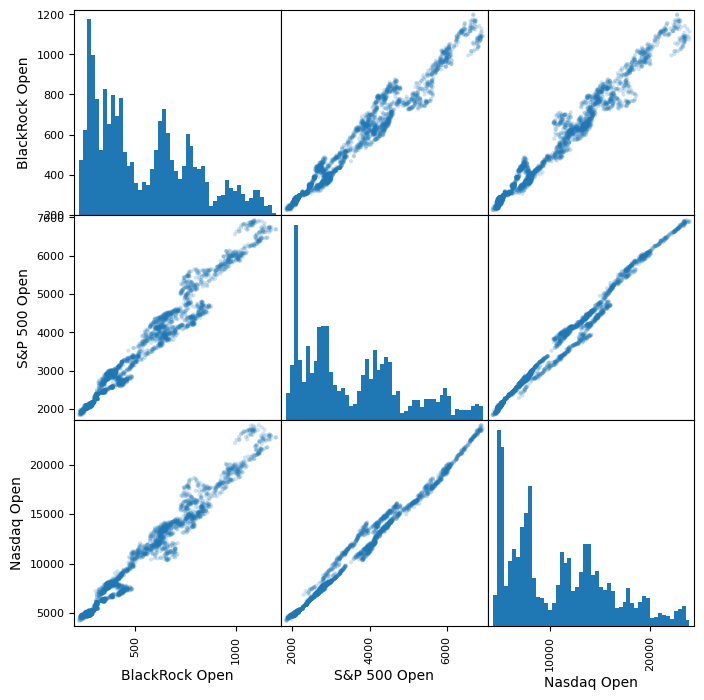

In [113]:
#Basic Analysis
from pandas.plotting import scatter_matrix
import pandas as pd

ret_comp = pd.concat([blackrock['Open'],sp500['Open'],nasdaq['Open']], axis = 1)
ret_comp.columns = ['BlackRock Open', 'S&P 500 Open', 'Nasdaq Open']
scatter_matrix(ret_comp, figsize =(8,8), alpha = 0.2, hist_kwds={'bins':50});